<a href="https://colab.research.google.com/github/grjadhav409/ATG4B-inhibitors-prediction-using-ML/blob/main/2_4_pre_model_building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## lib

In [ ]:
# Load librarie
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sklearn

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(rc={"figure.figsize": (20, 15)})
sns.set_style("whitegrid")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## data load

In [ ]:
import pandas as pd

In [ ]:
df1= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/drug discovery/ATG4B/data_atg4b/X_padel.csv")
df2= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/drug discovery/ATG4B/data_atg4b/y_pic50.csv")
df4= pd.concat([df1,df2],axis=1)
df5 = df4.loc[:,~df4.columns.str.match("Unnamed")]
df5

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,0,-0.2098,0.044016,56.4955,68.375446,20,22,55,33,22,...,0,0,0,0,0,0,0,0,0,4.876148
1,0,1.3986,1.956082,36.8320,42.410344,12,12,34,26,8,...,0,0,0,0,0,0,0,0,0,5.048662
2,0,0.8315,0.691392,27.5014,42.058895,12,12,34,19,15,...,0,0,0,0,0,0,0,0,0,4.735182
3,1,1.7036,2.902253,71.8077,50.561481,6,6,40,23,17,...,0,0,0,0,0,0,0,0,0,4.767004
4,0,-1.4759,2.178281,59.1836,60.832204,11,11,54,26,28,...,0,0,0,0,0,0,0,0,0,4.928118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,-1.9079,3.640082,44.5948,55.167653,12,12,48,27,21,...,0,0,0,0,0,0,0,0,0,4.464706
370,0,1.3296,1.767836,47.6401,52.458309,16,16,42,29,13,...,0,0,0,0,0,0,0,0,0,4.677781
371,0,-2.0054,4.021629,37.0838,69.884688,26,35,54,38,16,...,0,0,0,0,0,0,0,0,0,4.244125
372,0,-0.8215,0.674862,39.4075,55.348653,17,17,48,27,21,...,0,0,0,0,0,0,0,0,0,4.701147


In [ ]:
# Replace to drop rows or columns infinite values
df6 = df5.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
df6

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
1,0,1.3986,1.956082,36.8320,42.410344,12,12,34,26,8,...,0,0,0,0,0,0,0,0,0,5.048662
4,0,-1.4759,2.178281,59.1836,60.832204,11,11,54,26,28,...,0,0,0,0,0,0,0,0,0,4.928118
6,0,-1.2775,1.632006,14.9141,33.345137,12,13,26,17,9,...,0,0,0,0,0,0,0,0,0,5.806875
7,0,1.6560,2.742336,80.4116,65.128653,12,17,51,30,21,...,0,0,0,0,0,0,0,0,0,4.709965
8,0,-0.4942,0.244234,41.5289,58.759860,17,17,47,27,20,...,0,0,0,0,0,0,0,0,0,4.818156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0,-0.1764,0.031117,57.0806,66.392653,16,17,54,33,21,...,0,0,0,0,0,0,0,0,0,4.096910
368,0,-0.4191,0.175645,49.0791,58.261239,12,12,51,28,23,...,0,0,0,0,0,0,0,0,0,4.258848
369,0,-1.9079,3.640082,44.5948,55.167653,12,12,48,27,21,...,0,0,0,0,0,0,0,0,0,4.464706
371,0,-2.0054,4.021629,37.0838,69.884688,26,35,54,38,16,...,0,0,0,0,0,0,0,0,0,4.244125


In [ ]:
# Load Train set
df_train = df6.iloc[ :300, :]

# Load Test set
df_test = df6.iloc[ 300: , :]

In [ ]:
df_train

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
1,0,1.3986,1.956082,36.8320,42.410344,12,12,34,26,8,...,0,0,0,0,0,0,0,0,0,5.048662
4,0,-1.4759,2.178281,59.1836,60.832204,11,11,54,26,28,...,0,0,0,0,0,0,0,0,0,4.928118
6,0,-1.2775,1.632006,14.9141,33.345137,12,13,26,17,9,...,0,0,0,0,0,0,0,0,0,5.806875
7,0,1.6560,2.742336,80.4116,65.128653,12,17,51,30,21,...,0,0,0,0,0,0,0,0,0,4.709965
8,0,-0.4942,0.244234,41.5289,58.759860,17,17,47,27,20,...,0,0,0,0,0,0,0,0,0,4.818156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0,-0.1764,0.031117,57.0806,66.392653,16,17,54,33,21,...,0,0,0,0,0,0,0,0,0,4.096910
368,0,-0.4191,0.175645,49.0791,58.261239,12,12,51,28,23,...,0,0,0,0,0,0,0,0,0,4.258848
369,0,-1.9079,3.640082,44.5948,55.167653,12,12,48,27,21,...,0,0,0,0,0,0,0,0,0,4.464706
371,0,-2.0054,4.021629,37.0838,69.884688,26,35,54,38,16,...,0,0,0,0,0,0,0,0,0,4.244125


In [ ]:
df_test

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50


In [ ]:
# info of each of the variables in our train set
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 1 to 372
Columns: 2757 entries, nAcid to pIC50
dtypes: float64(1844), int64(913)
memory usage: 5.1 MB


# split

In [ ]:
# Extract the features (X) and the target (y)
# Features (X)
X = df6[[i for i in list(
    df6.columns) if i != "pIC50"]]
print(X.shape)

# Target (y)
y = df6.loc[:, "pIC50"]
print(y.shape)

(243, 2756)
(243,)


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
print(f"\nX_test:{X_test.shape}\ny_test:{y_test.shape}")

X_train:(194, 2756)
y_train:(194,)

X_test:(49, 2756)
y_test:(49,)


# <font color='darkblue'>IV. Modeling</font>

## <font color = 'darkblue'> IV.1. Models and metrics selection<font>

<font color = 'darkblue'> Here I am going to use RMSE and R² metrics in order to measure the performance of the selected models and their predictions.
    
<font color = 'darkblue'>Then I will test the models that best meet the estimation of house prices. It's clearly a regression so here are the following models I will use:
- Ridge regression
- Lasso regression
- Elastic Net regression
- Support Vector regression (SVR)
- Random Forest regression
- XGBoost
- LigthGBM
    <font>

In [ ]:
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
# Let's define a function for each metrics
# R²
def rsqr_score(test, pred):
    """Calculate R squared score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        R squared score 
    """
    r2_ = r2_score(test, pred)
    return r2_


# RMSE
def rmse_score(test, pred):
    """Calculate Root Mean Square Error score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        Root Mean Square Error score
    """
    rmse_ = np.sqrt(mean_squared_error(test, pred))
    return rmse_


# Print the scores
def print_score(test, pred):
    """Print calculated score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        print the regressor name
        print the R squared score
        print Root Mean Square Error score
    """

    print(f"- Regressor: {regr.__class__.__name__}")
    print(f"R²: {rsqr_score(test, pred)}")
    print(f"RMSE: {rmse_score(test, pred)}\n")

In [ ]:
# Define regression models
ridge = Ridge()
lasso = Lasso(alpha=0.001)
elastic = ElasticNet(alpha=0.001)
svr = SVR()
rdf = RandomForestRegressor()
xgboost = XGBRegressor()
lgbm = LGBMRegressor()

# Train models on X_train and y_train
for regr in [ridge, lasso, elastic, svr, rdf, xgboost, lgbm]:
    # fit the corresponding model
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    # Print the defined metrics above for each classifier
    print_score(y_test, y_pred)

- Regressor: Ridge
R²: -5.681245605828909
RMSE: 1.5356933645592599

- Regressor: Lasso
R²: -2.0682789614201216
RMSE: 1.0406943827261834

- Regressor: ElasticNet
R²: -2.3075891747860413
RMSE: 1.0805169157338654

- Regressor: SVR
R²: -0.190129118635064
RMSE: 0.6481459771904248

- Regressor: RandomForestRegressor
R²: 0.23406211616720807
RMSE: 0.5199631481969414

[10:37:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
- Regressor: XGBRegressor
R²: 0.25281604195034635
RMSE: 0.5135580709163001

- Regressor: LGBMRegressor
R²: 0.10974163642814216
RMSE: 0.5605751224859958



<font color = 'darkblue'>According to the result of R² and Root Mean Squared of these 7 models, we can conclude that the relationship between the features and the target variable is clearly linear. Thus, in the next part I will optimize the hyperparameters of all the models except SVR. <font>
    
<font color='darkblue'> Indeed, SVR acknowledges the presence of non-linearity in the data and provides a proficient prediction model. The basic idea behind SVR is to find the best fit line which is a hyperplane that has the maximum number of points. It is clear that our model is linear that's why I will not optimize the SVR model<font>

[Click here for more information](https://towardsdatascience.com/unlocking-the-true-power-of-support-vector-regression-847fd123a4a0)

## <font color = 'darkblue'> IV.2. Hyperparameters tuning and model optimization<font>

### <font color='darkblue'> IV.2.1. Ridge regression<font>

<font color='darkblue'> Ridge will reduce the impact of features that are not important in predicting the target values.
    
[Click here for more information about Ridge regression](https://medium.com/@vijay.swamy1/lasso-versus-ridge-versus-elastic-net-1d57cfc64b58)<font>


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters
alphas = np.logspace(-5, 5, 50).tolist()

tuned_parameters = {"alpha": alphas}

# GridSearch
ridge_cv = GridSearchCV(Ridge(), tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
ridge_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {ridge_cv.best_params_}")
print(f"Best R² (train): {ridge_cv.best_score_}")

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best hyperparameters: {'alpha': 9540.954763499964}
Best R² (train): -22265.34510104013


In [ ]:
# Ridge Regressor with the best hyperparameters
ridge_mod = Ridge(alpha=ridge_cv.best_params_["alpha"])

# Fit the model on train set
ridge_mod.fit(X_train, y_train)

# Predict on test set
y_pred = ridge_mod.predict(X_test)

print(f"- {ridge_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

- Ridge
R²: -0.7445660886373351
RMSE: 0.7847286386261334


In [ ]:
# Save the model results into lists
model_list = []
r2_list = []
rmse_list = []

model_list.append(ridge_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

In [ ]:
y_test

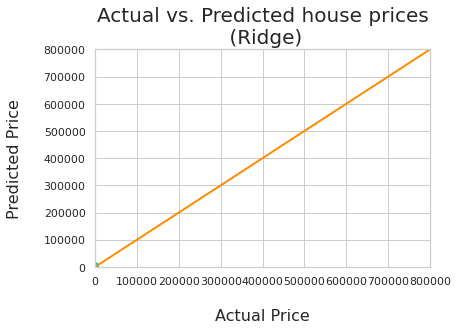

In [ ]:
# Plot Actual vs. Predicted house prices
actual_price = np.exp(y_test)
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices\n (Ridge)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

<font color='darkblue'> The model is able to predict house prices. However, it underestimates the prices of houses above 400,000 dollars <font>

### <font color='darkblue'> IV.2.2. Lasso regression<font>

<font color='darkblue'> Lasso will eliminate many features, and reduce overfitting in the linear model.

[Click here for more information about Lasso regression](https://medium.com/@vijay.swamy1/lasso-versus-ridge-versus-elastic-net-1d57cfc64b58)<font>

In [ ]:
# Define hyperparameters
alphas = np.logspace(-5, 5, 50).tolist()

tuned_parameters = {"alpha": alphas}

# GridSearch
lasso_cv = GridSearchCV(Lasso(), tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
lasso_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {lasso_cv.best_params_}")
print(f"Best R² (train): {lasso_cv.best_score_}")

Fitting 10 folds for each of 50 candidates, totalling 500 fits


KeyboardInterrupt: ignored

In [ ]:
# Lasso Regressor with the best hyperparameters
lasso_mod = Lasso(alpha=lasso_cv.best_params_["alpha"])

# Fit the model on train set
lasso_mod.fit(X_train, y_train)

# Predict on test set
y_pred = lasso_mod.predict(X_test)

print(f"- {lasso_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

In [ ]:
# Save the model results into lists
model_list.append(lasso_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

In [ ]:
# Plot Actual vs. Predicted house prices
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices\n (Lasso)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

### <font color = 'darkblue'> IV.2.3. XGBoost regression <font>

<font color='darkblue'>XGBoost is one of the most popular algorithms that are based on Gradient Boosted Machines. Gradient Boosting refers to a methodology where an ensemble of weak learners is used to improve the model performance in terms of efficiency, accuracy, and interpretability. Gradient Boosting can be applied to a regression by taking the average of the outputs by the weak learners. <font>

[Click here for more information about XGBoost](https://neptune.ai/blog/xgboost-vs-lightgbm)

In [ ]:
# Define hyperparameters
tuned_parameters = {"max_depth": [3],
                    "colsample_bytree": [0.3, 0.7],
                    "learning_rate": [0.01, 0.05, 0.1],
                    "n_estimators": [100, 500]}

# GridSearch
xgbr_cv = GridSearchCV(estimator=XGBRegressor(),
                       param_grid=tuned_parameters,
                       cv=5,
                       n_jobs=-1,
                       verbose=1)

# fit the GridSearch on train set
xgbr_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {xgbr_cv.best_params_}\n")
print(f"Best R²: {xgbr_cv.best_score_}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[10:43:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best hyperparameters: {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

Best R²: 0.2436861423298188


<font color='darkblue'>It's always better to set more hyperparameters with more cross validation but it's very time consuming with XGBRegressor in kaggle kerner. Thus, I limited the tuning to 3 hyperparameters with 5 cross validation only.

In [ ]:
# XGB Regressor with the best hyperparameters
xgbr_mod = XGBRegressor(seed=20,
                        colsample_bytree=xgbr_cv.best_params_["colsample_bytree"],
                        learning_rate=xgbr_cv.best_params_["learning_rate"],
                        max_depth=xgbr_cv.best_params_["max_depth"],
                        n_estimators=xgbr_cv.best_params_["n_estimators"])

# Fit the model on train set
xgbr_mod.fit(X_train, y_train)

# Predict on test set
y_pred = xgbr_mod.predict(X_test)

print(f"- {xgbr_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

[10:43:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
- XGBRegressor
R²: 0.19362791062681195
RMSE: 0.5335111901240662


In [ ]:
# Save the model results into lists
model_list.append(xgbr_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

In [ ]:
y_test.to_list()

[4.838631997765025,
 4.580044251510242,
 4.82102305270683,
 4.892790030352131,
 4.966576244513051,
 5.293282217663241,
 5.041436116778033,
 5.188424994129407,
 6.29929628285498,
 4.954677021213342,
 5.590066876668706,
 4.85078088734462,
 5.166852888087215,
 7.136677139879544,
 5.694648630553377,
 5.26440110030182,
 5.452225294612178,
 6.5003129173815966,
 5.795880017344075,
 4.906578314837765,
 4.688246138944246,
 4.931814138253838,
 4.366531544420414,
 4.876148359032914,
 5.730487055782084,
 5.886056647693163,
 5.089375595110798,
 6.443697499232712,
 5.091514981121351,
 6.142667503568731,
 4.832682665251824,
 4.718966632752273,
 4.804100347590766,
 5.0195421077239,
 4.292429823902063,
 4.096910013008056,
 4.728158393463501,
 5.044793462458058,
 5.175874166083451,
 5.966576244513051,
 4.913640169325252,
 5.247951552180561,
 4.761953896871205,
 5.11975822410452,
 4.767003889607846,
 5.769551078621726,
 4.892790030352131,
 5.3872161432802645,
 5.067526235322847]

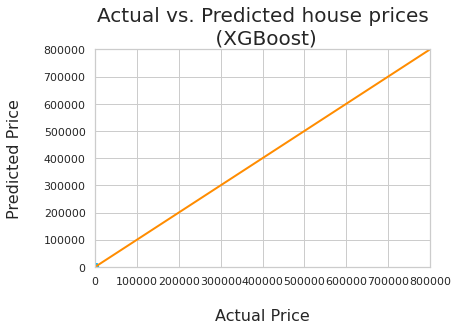

In [ ]:
# Plot Actual vs. Predicted house prices
actual_price = np.exp(y_test.to_list())
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices\n (XGBoost)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

### <font color = 'darkblue'> IV.2.4. LightGBM regression <font>

<font color='darkblue'> LightGBM is also one of the most popular algorithms that are based on Gradient Boosted Machines.<font>

[Click here for more information about LightGBM](https://neptune.ai/blog/xgboost-vs-lightgbm)

In [ ]:
# Define hyperparameters
tuned_parameters = {"max_depth": [3, 6, 10], "learning_rate": [
    0.01, 0.05, 0.1], "n_estimators": [100, 500, 1000], }

# GridSearch
lgbm_cv = GridSearchCV(estimator=LGBMRegressor(
), param_grid=tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
lgbm_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {lgbm_cv.best_params_}\n")
print(f"Best R²: {lgbm_cv.best_score_}")

In [ ]:
# LGBM Regressor with the best hyperparameters
lgbm_mod = LGBMRegressor(learning_rate=lgbm_cv.best_params_["learning_rate"],
                         max_depth=lgbm_cv.best_params_["max_depth"],
                         n_estimators=lgbm_cv.best_params_["n_estimators"])

# Fit the model on train set
lgbm_mod.fit(X_train, y_train)

# Predict on test set
y_pred = lgbm_mod.predict(X_test)

print(f"- {lgbm_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

In [ ]:
# Save the model results into lists
model_list.append(lgbm_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

In [ ]:
# Plot Actual vs. Predicted house prices
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices\n (LGBM)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

## <font color ='darkblue'> IV.3. Choosing the best model<font>

In [ ]:
# Create a table with pd.DataFrame
model_results = pd.DataFrame({"Model": model_list,
                              "R²": r2_list,
                              "RMSE": rmse_list})

model_results

<font color='darkblue'>The results show that that the best performances in terms of R squared (R²) and Root Mean Square Error (RMSE) correspond to Ridge, Lasso and XGB Regressor.
     
<font color='darkblue'>Based on these results and the results of the figures that show the Actual prices vs. Predicted prices, we can conclude that the XGB Regressor model has the best performance.<font>
    
<font color='red'>Thus, XGB Regressor model will be chosen to predict house prices of the Test set of this Kaggle competition.

## <font color ='darkblue'> IV.4. Prediction on 'House Prices-Advanced Regression Techniques' test data set<font>

<font color='darkblue'>By spliting the training data into X_train and X_test we kind of lost some of this training data. A solution will be to update our model chosen on the X_test dataset before predicting on the test dataset of the competition. 

In [ ]:
# Predictions from Ridge model
predictions_list = xgbr_mod.predict(df_test_new)

# Conversion of logarithmic predictions to logical data Sale Price
saleprice_preds = np.exp(predictions_list)

# DataFrame of test ID and their corresponding predictions
output = pd.DataFrame({"Id": Id_test_list,
                       "SalePrice": saleprice_preds})
output.head(10)

In [ ]:
# Save the output
output.to_csv("submission.csv", index=False)